# Week4: HW2_Kwonsang Jung

## Imbalanced Classification Dataset

Counter({0: 9900, 1: 100})


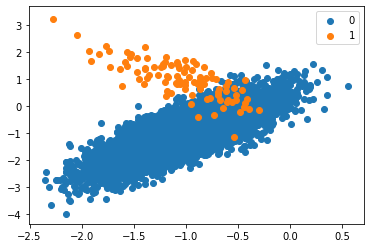

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [2]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.808


## Weighted SVM with Scikit-Learn

In [3]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale', class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.967


## Grid Search Weighted SVM

In [4]:
from sklearn.model_selection import GridSearchCV

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale')

balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

grid_result = grid.fit(X, y)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.967747 using {'class_weight': {0: 1, 1: 100}}
0.742960 (0.149857) with: {'class_weight': {0: 100, 1: 1}}
0.748404 (0.149873) with: {'class_weight': {0: 10, 1: 1}}
0.807960 (0.126354) with: {'class_weight': {0: 1, 1: 1}}
0.934401 (0.065202) with: {'class_weight': {0: 1, 1: 10}}
0.967747 (0.038637) with: {'class_weight': {0: 1, 1: 100}}
